In [17]:
import GetOldTweets3 as got
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

In [2]:
classifier = pipeline("zero-shot-classification")

All model checkpoint weights were used when initializing TFRobertaForSequenceClassification.

All the weights of TFRobertaForSequenceClassification were initialized from the model checkpoint at roberta-large-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [35]:
# Function that pulls tweets based on a general search query

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_df(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count).setLang('en')
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[tweet.date, tweet.text] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text'])

    return tweets_df

# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
txt = 'climate fight'
max_recs = 500

# Calling function to query X amount of relevant tweets and create a CSV file
tweets_df = text_query_to_df(txt, max_recs)

In [36]:
tweets_df.head(10)

,Datetime,Text
0,2020-08-19 20:26:39+00:00,We’ve got to fight to create a better climate ...
1,2020-08-13 13:33:15+00:00,What is your favorite party game? Have a look ...
2,2020-08-19 20:25:11+00:00,"In this same note, fight liberal rhetoric with..."
3,2020-08-19 20:24:05+00:00,It’s beyond me how anyone can look at both par...
4,2020-08-19 20:24:01+00:00,The that she had to explain it further is just...
5,2020-08-19 20:23:54+00:00,America in 2020: our slave labor is too sick f...
6,2020-08-19 20:15:41+00:00,v cool to not be able to go anywhere because o...
7,2020-08-19 20:15:03+00:00,We're putting the #GlobalGoals and the fight a...
8,2020-08-19 20:14:18+00:00,‘So Much For Social Distancing’: Fight Breaks ...
9,2020-08-19 20:12:44+00:00,Some climate scientists have decided that IT W...


In [38]:
candidate_labels = ["renewable", "politics", "emission", "temperature", "emergency", "advertisment"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in tqdm(tweets_df['Text'].values):
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    if res['labels'][0] == 'renewable' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'politics' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'emission' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'temperature' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'emergency' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if res['labels'][0] == 'advertisment' and res['scores'][0] > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

100%|██████████| 500/500 [08:59<00:00,  1.08s/it]


We’ve got to fight to create a better climate future. As President, #JoeBiden will lead! Joe plans to address the #ClimateEmergency &amp; #Lead through the power of example, by ensuring the U.S. achieves a 100% #cleanenergy #economy and net-zero emissions no later than 2050. 
['emergency', 'renewable', 'politics', 'emission', 'temperature', 'advertisment']
[0.5519682765007019, 0.1375490128993988, 0.1342298537492752, 0.10433920472860336, 0.04250862076878548, 0.029404979199171066]


What is your favorite party game? Have a look on @ClumsyRush https://www.nintendo.com/games/detail/clumsy-rush-switch/ #party #game #NintendoSwitch
['advertisment', 'renewable', 'emission', 'emergency', 'temperature', 'politics']
[0.6770496964454651, 0.12026847898960114, 0.11964714527130127, 0.04079712554812431, 0.026453601196408272, 0.015783896669745445]


In this same note, fight liberal rhetoric with your own. They say "kids in cages" accuse them of wanting sex trafficking to continue. They screech about c

In [39]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head()

,labels,values
0,renewable,8
1,politics,66
2,emission,14
3,temperature,39
4,emergency,16


<AxesSubplot:xlabel='labels', ylabel='values'>

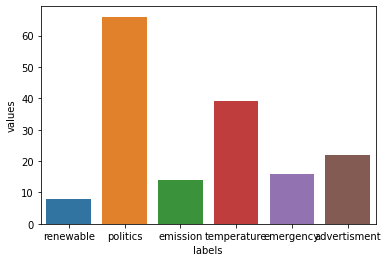

In [40]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )